<img src='projet3bis.PNG'>

# Sommaire :
**Partie 1 : Importation des librairies et de jeu de données**

 - <a href="#C1">Importation des librairies et de jeu de données</a>
 

**Partie 2 : Analyse exploratoire**
 - <a href="#C4">Analyse exploratoire</a>


# <a name="C1">Importation des librairies et de jeu de données</a>

# <a name="C1">Partie 1: Importation de librairies et de jeu données</a>


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import seaborn as sns

from scipy.stats import kstest
from scipy.stats import ks_2samp

import statsmodels.api as sm



from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [3]:
dfP3 = pd.read_csv('donneesPropresP3.csv')
dfP3.head()

,nutrition_grade_fr,pnns_groups_1,product_name,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,omega-6-fat_100g,omega-9-fat_100g,trans-fat_100g,cholesterol_100g,Omega 6 / Omega 3
0,c,Sugary snacks,Chaussons tressés aux pommes,10.70,2.00,3.33,5.33,1.075012,1.750000,3.33,0.667,0.00533,2.825013
1,b,Cereals and potatoes,White enriched bread,1.79,0.00,0.00,0.00,6.974400,3.966667,0.00,0.000,0.00000,10.941067
2,b,Cereals and potatoes,Light Rye,2.22,1.11,0.00,0.00,6.974400,3.966667,0.00,0.000,0.00000,10.941067
3,b,Cereals and potatoes,Hamburger enriched buns,2.33,0.00,0.00,0.00,6.974400,3.966667,0.00,0.000,0.00000,10.941067
4,b,Salty snacks,Sliced Almonds,50.00,3.33,33.30,10.00,4.520000,38.350000,33.30,0.000,0.00000,42.870000


# <a name="C4">Partie 2 : Analyse exploratoire </a>

 
<br>

## Analyse univariée :
<br>

### Distribution empirique :

#### Répartition des produits par catégories :

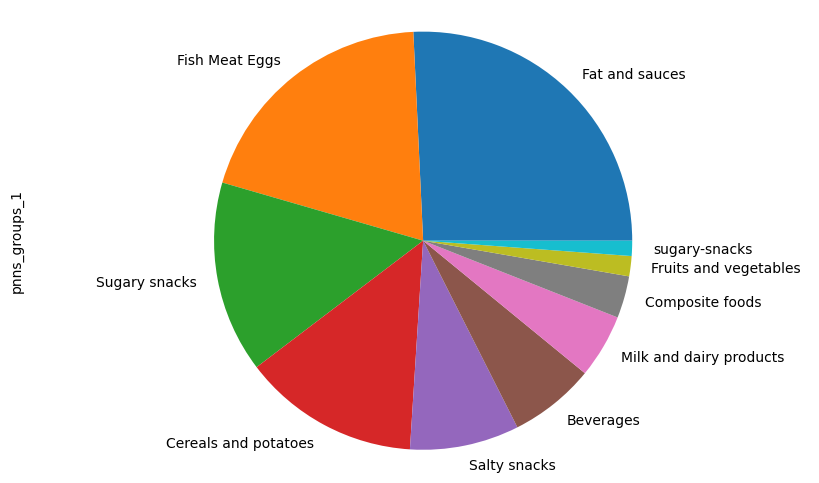

<Figure size 640x480 with 0 Axes>

In [4]:
plt.figure(figsize=(10,6), dpi=100)
dfP3['pnns_groups_1'].value_counts(normalize=True).plot(kind='pie')
plt.axis('equal') 
plt.show();
plt.savefig('RepartitionCategoriePnns.png',bbox_inches='tight')

#### Répartition des produits par nutriscor fr :

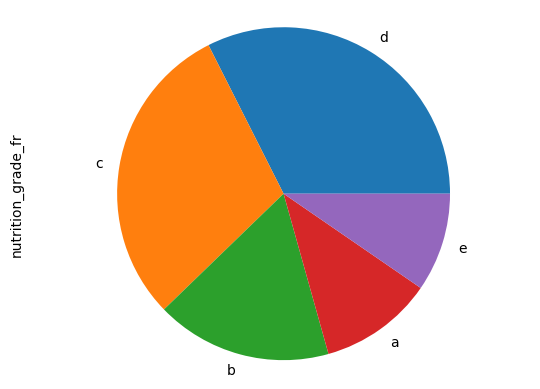

In [5]:
dfP3['nutrition_grade_fr'].value_counts(normalize=True).plot(kind='pie')
plt.axis('equal') 
plt.show()

==> La plus grande majorité de produit est de catégorie c et d.

#### Diagramme de distribution  :
1 Taux d'acide gras :

<Figure size 1800x900 with 0 Axes>

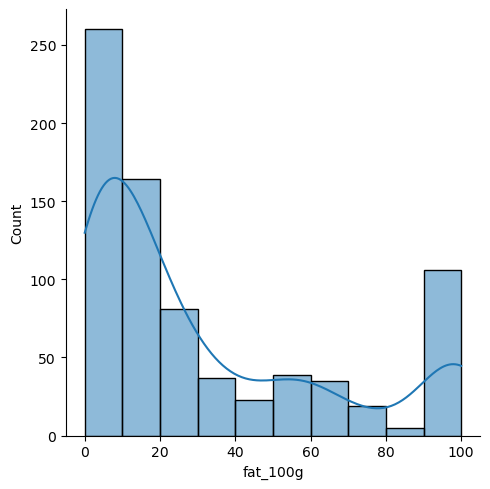

In [6]:
plt.figure(figsize=(12,6), dpi=150)
sns.displot(data=dfP3,x='fat_100g',bins=10,kde=True);
plt.savefig('fat_100g.png', bbox_inches='tight')

In [7]:
kstest(dfP3['fat_100g'], 'norm')

KstestResult(statistic=0.8761107401023153, pvalue=0.0)

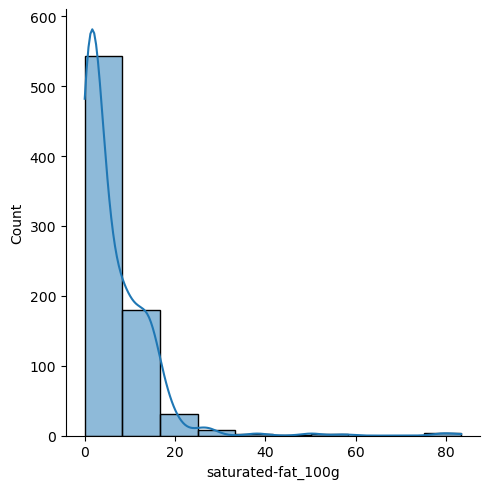

In [8]:
sns.displot(data=dfP3,x='saturated-fat_100g', kde=True, bins=10);
plt.savefig('saturated-fat_100g.png', bbox_inches='tight')

In [9]:
kstest(dfP3['saturated-fat_100g'], 'norm')

KstestResult(statistic=0.6422098110312613, pvalue=2.917381211518094e-309)

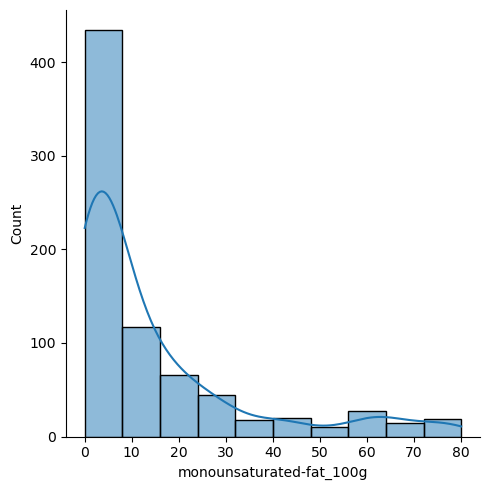

In [10]:
sns.displot(data=dfP3,x='monounsaturated-fat_100g', kde=True, bins=10);
plt.savefig('monounsaturated-fat_100g.png', bbox_inches='tight')

In [11]:
kstest(dfP3['monounsaturated-fat_100g'], 'norm')

KstestResult(statistic=0.7020277564148764, pvalue=0.0)

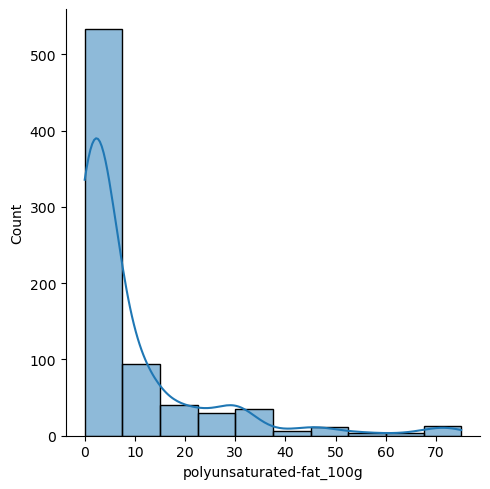

In [12]:
sns.displot(data=dfP3,x='polyunsaturated-fat_100g',kde=True, bins=10);
plt.savefig('polyunsaturated-fat_100g.png', bbox_inches='tight')

In [13]:
kstest(dfP3['polyunsaturated-fat_100g'], 'norm')

KstestResult(statistic=0.6735944209710136, pvalue=0.0)

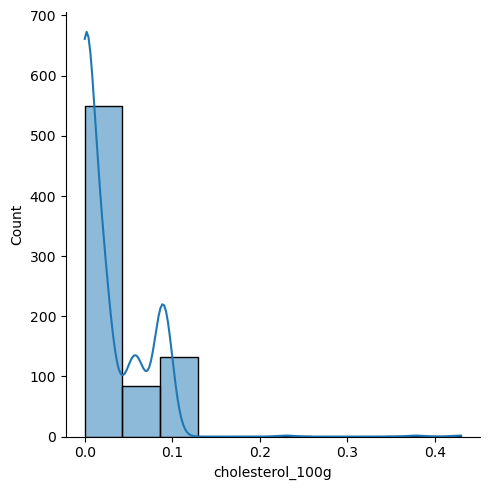

In [14]:
sns.displot(data=dfP3,x='cholesterol_100g',kde=True,bins=10);
plt.savefig('cholesterol_100g.png', bbox_inches='tight')

In [15]:
kstest(dfP3['cholesterol_100g'], 'norm')

KstestResult(statistic=0.5, pvalue=2.681396263795991e-178)

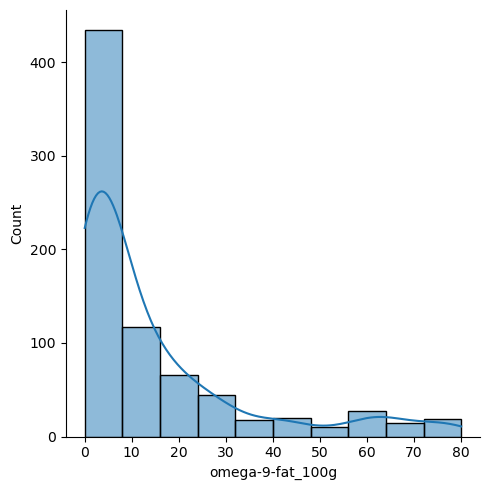

In [16]:
sns.displot(data=dfP3,x='omega-9-fat_100g',kde=True,bins=10);
plt.savefig('omega-9-fat_100g.png', bbox_inches='tight')

In [17]:
kstest(dfP3['omega-9-fat_100g'], 'norm')

KstestResult(statistic=0.7020277564148764, pvalue=0.0)

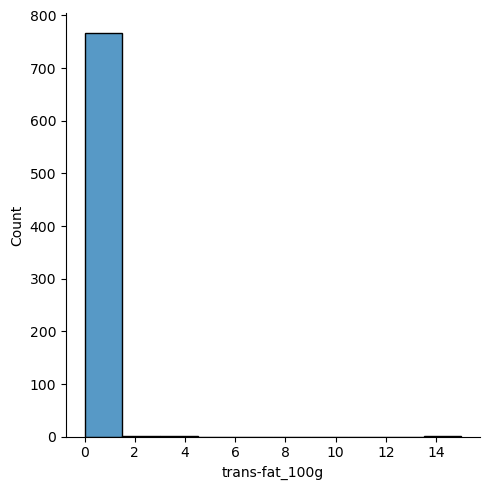

In [18]:
sns.displot(data=dfP3,x='trans-fat_100g',bins=10);
plt.savefig('trans-fat_100g.png', bbox_inches='tight')

In [19]:
kstest(dfP3['trans-fat_100g'], 'norm')

KstestResult(statistic=0.5, pvalue=2.681396263795991e-178)

==> vu les courbe kde et les tests KS aucune de ces distributions ne suivent la loi Normale

## Analyse bivariée :
### Diagramme de dispersion :

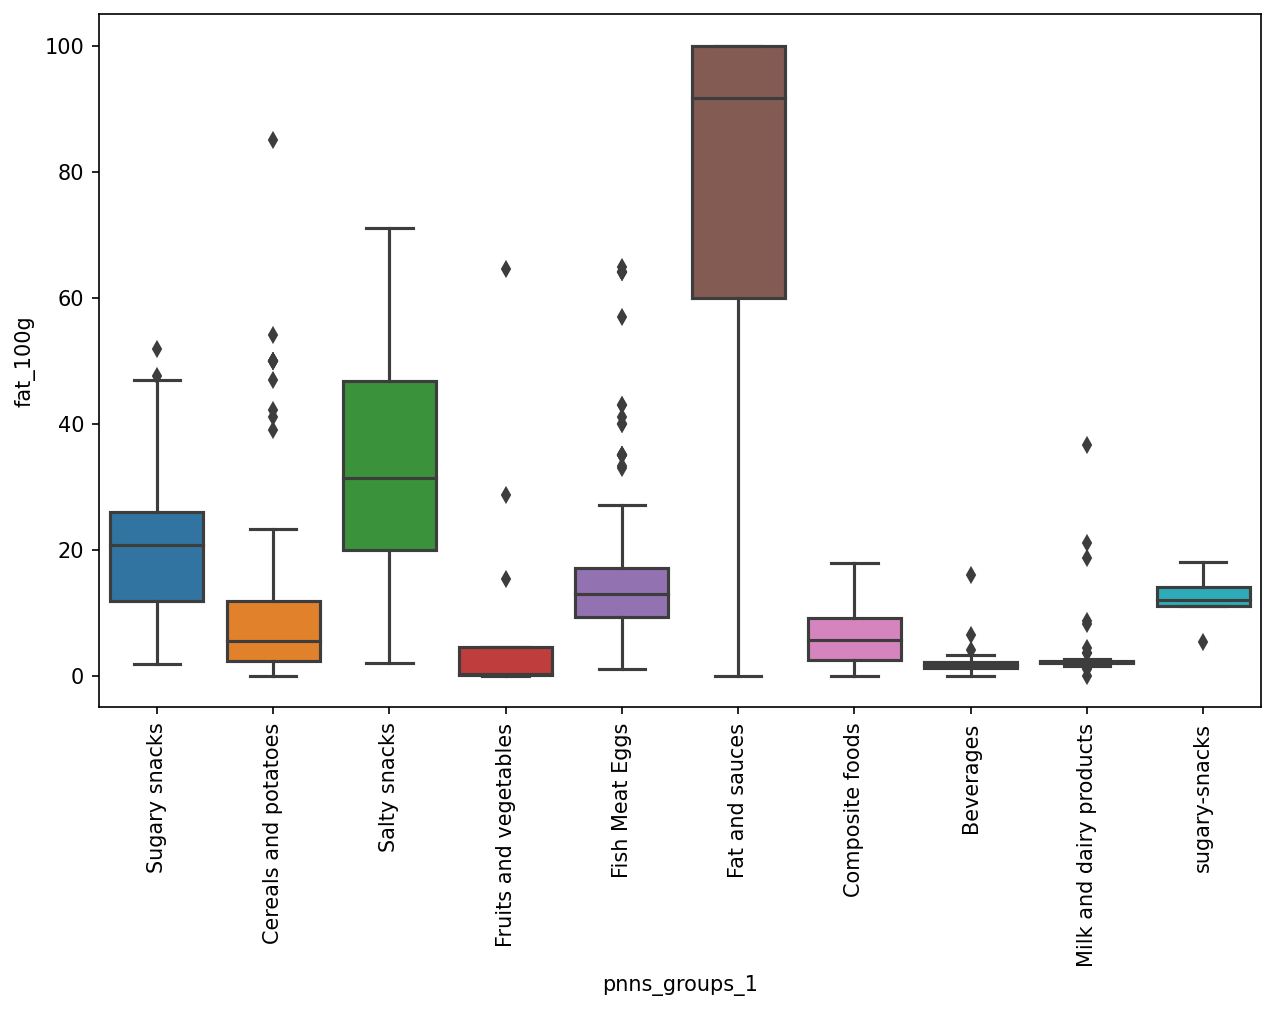

In [20]:
plt.figure(figsize=(10,6),dpi=150)
plt.xticks(rotation=90)
sns.boxplot(data=dfP3, x='pnns_groups_1',y='fat_100g');
plt.savefig('fatPnns.png', bbox_inches='tight')

==> Les mesures de tendance centrale de taux d'acide gras par catégorie ne sont pas stables d'une catégorie à une autre.

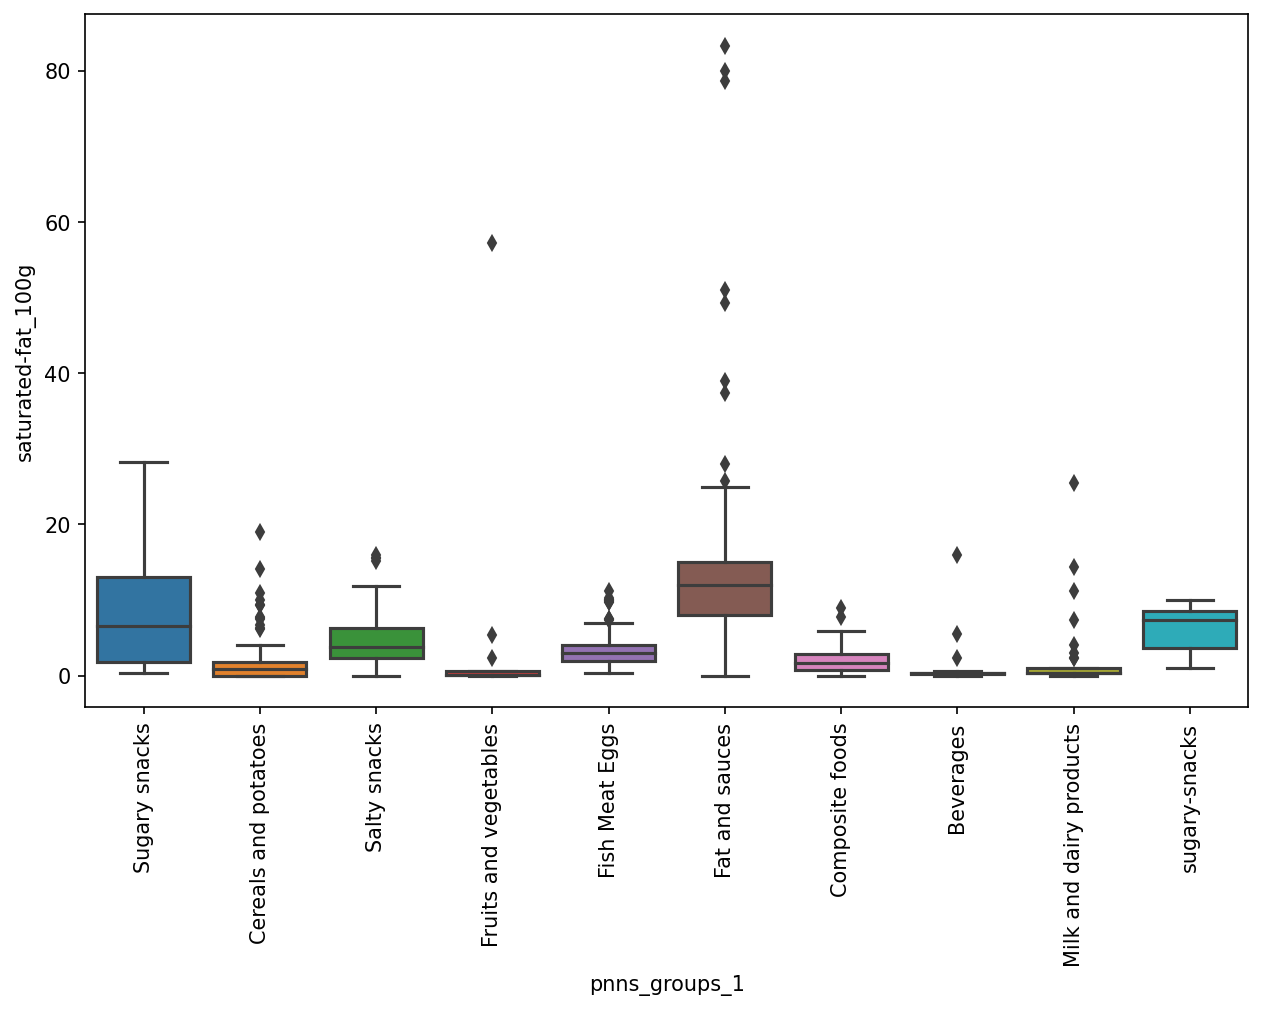

In [21]:
plt.figure(figsize=(10,6),dpi=150)
plt.xticks(rotation=90)
sns.boxplot(data=dfP3, x='pnns_groups_1',y='saturated-fat_100g');
plt.savefig('satPnn.png', bbox_inches='tight')

==> Les mesures de tendance centrale de taux d'acide gras saturé par catégorie sont homogènes malgré les points d'aberrations présents dans certaines catégories spécifiques.

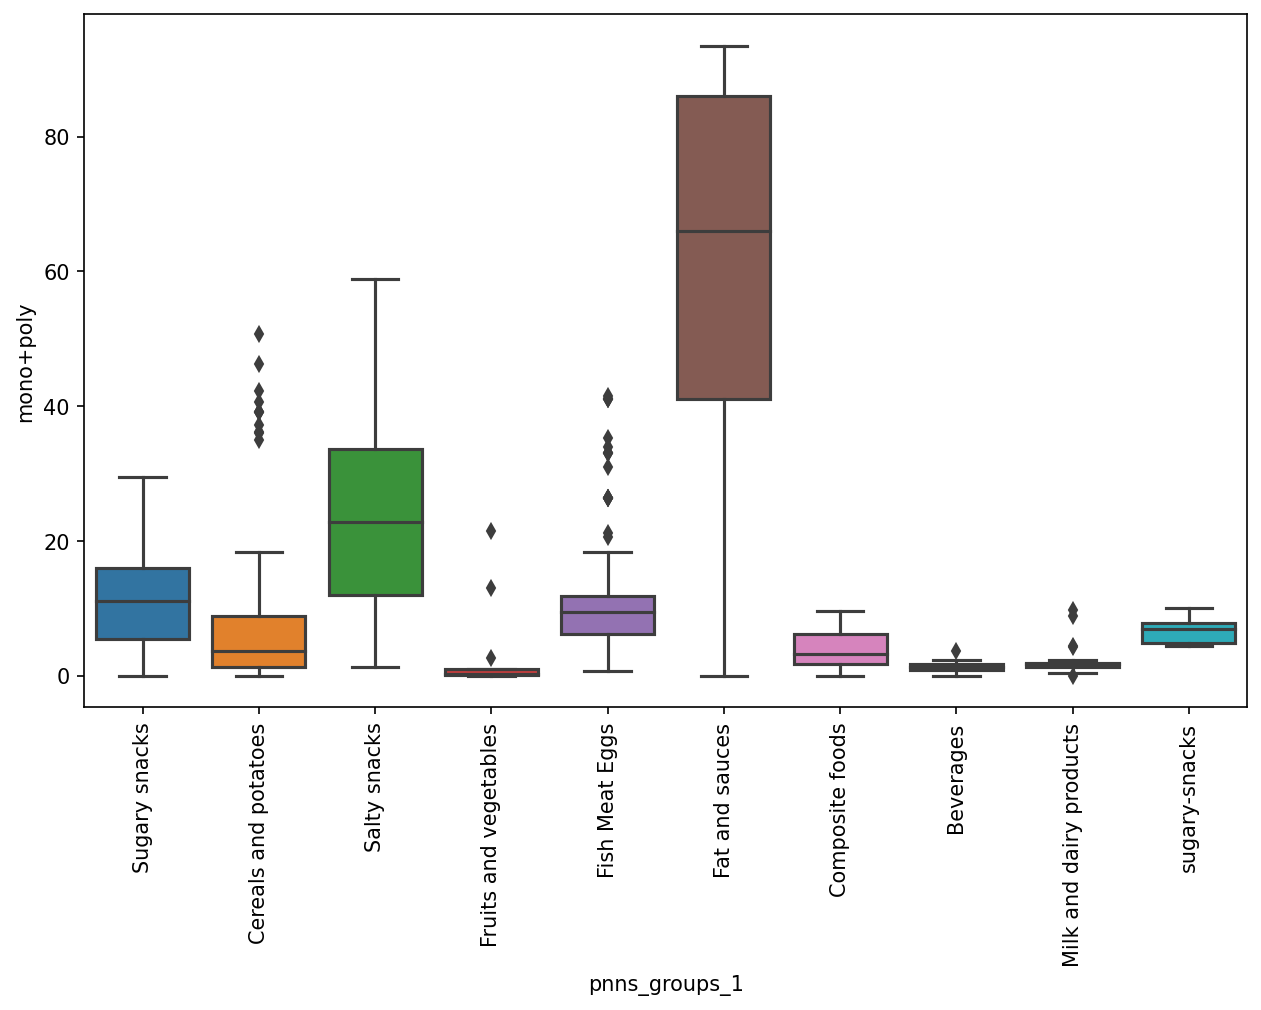

In [22]:
dfP3['mono+poly']=dfP3['monounsaturated-fat_100g']+dfP3['polyunsaturated-fat_100g']

plt.figure(figsize=(10,6),dpi=150)
plt.xticks(rotation=90)
sns.boxplot(data=dfP3, x='pnns_groups_1',y='mono+poly');
plt.savefig('polyUnPnn.png', bbox_inches='tight')

==> les produits appartenant aux catégories 'Fat and sauce' et 'Salty snacks' affichent un taux plus élévé des acides gras insaturés que les autres catégories. 

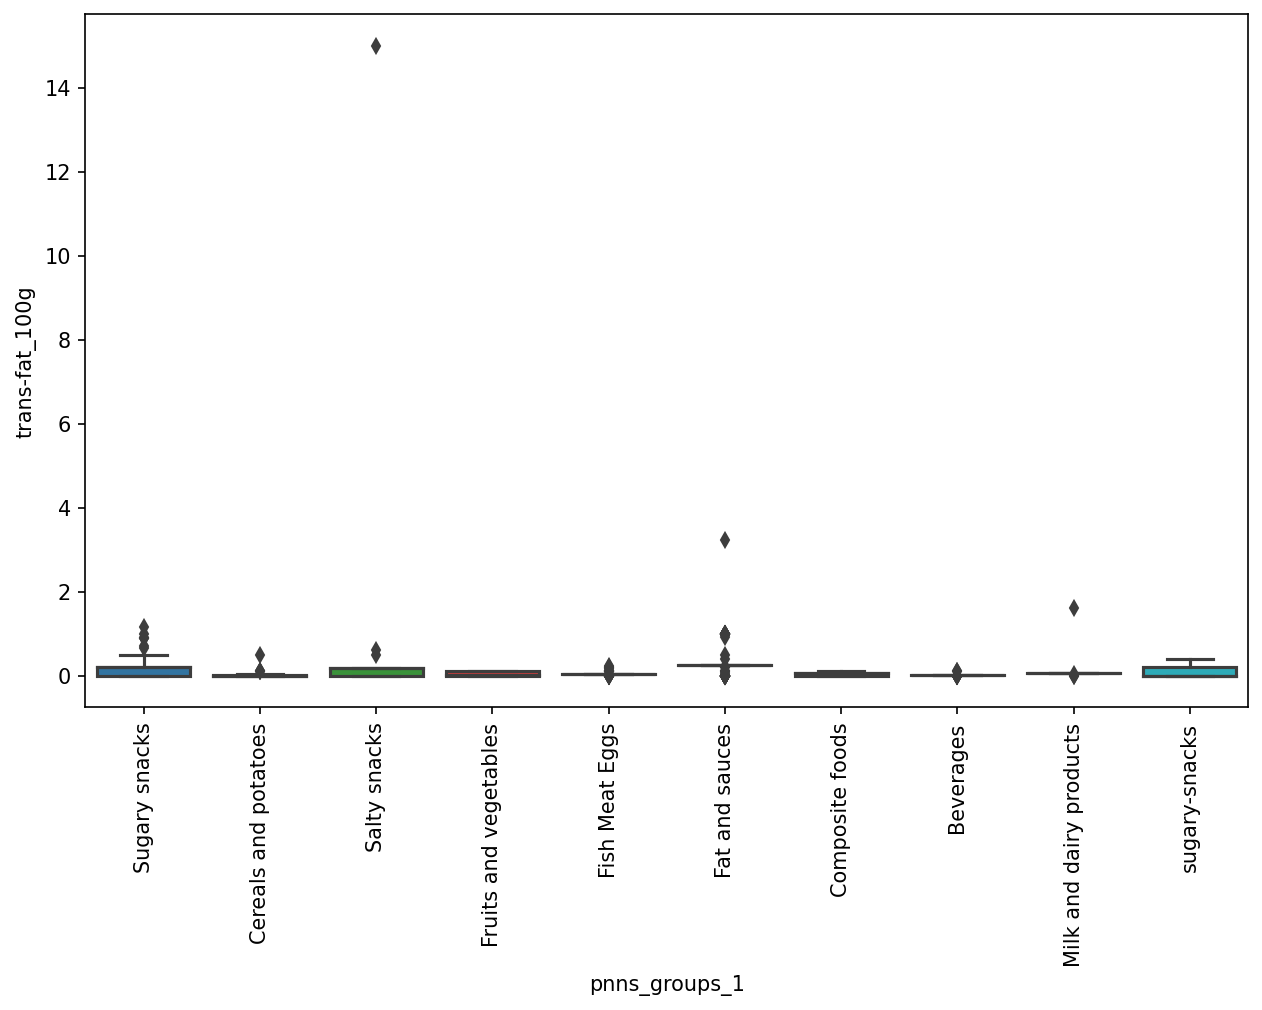

In [23]:
plt.figure(figsize=(10,6),dpi=150)
plt.xticks(rotation=90)
sns.boxplot(data=dfP3, x='pnns_groups_1',y='trans-fat_100g');
plt.savefig('transPnn.png', bbox_inches='tight')

==> le % de l'acide gras trans est à l'entour de zéro.

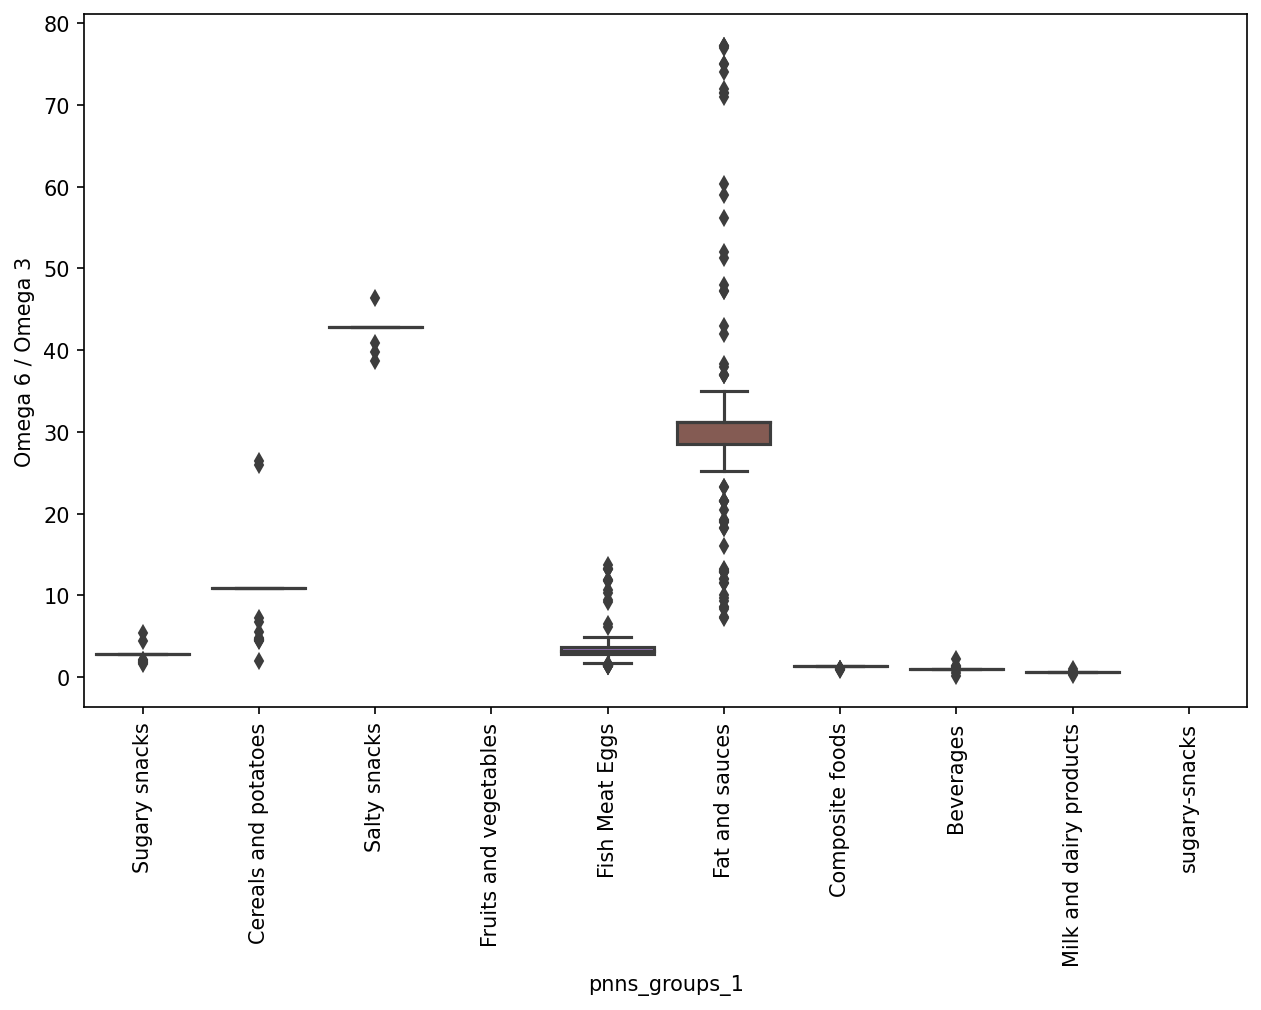

In [24]:
plt.figure(figsize=(10,6),dpi=150)
plt.xticks(rotation=90)
sns.boxplot(data=dfP3, x='pnns_groups_1',y='Omega 6 / Omega 3');
plt.savefig('ratioOmegaPnn.png', bbox_inches='tight')

==> La moyenne de ratio oméga6/oméga3 est très élevé dans la catégorie "Fat and sauces'.

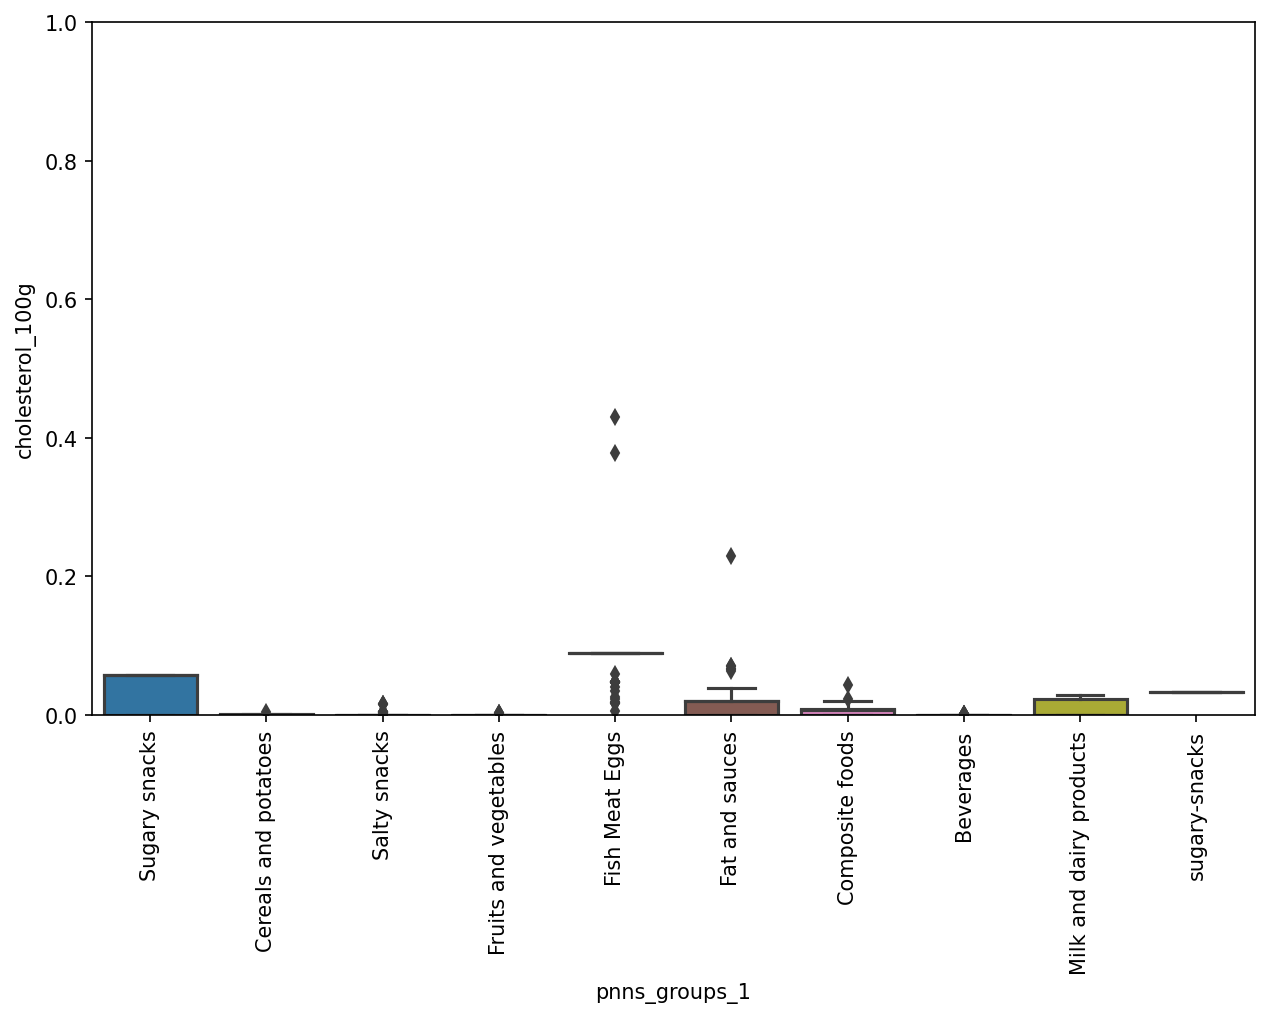

In [25]:
plt.figure(figsize=(10,6),dpi=150)
plt.xticks(rotation=90)
plt.ylim(0,1)
sns.boxplot(data=dfP3, x='pnns_groups_1',y='cholesterol_100g');
plt.savefig('cholespnn.png', bbox_inches='tight')

==> Le taux de cholestérol est très élevé uniquement dans la catégorie 'Fish Meat Eggs'

 #### Etude de corrélation

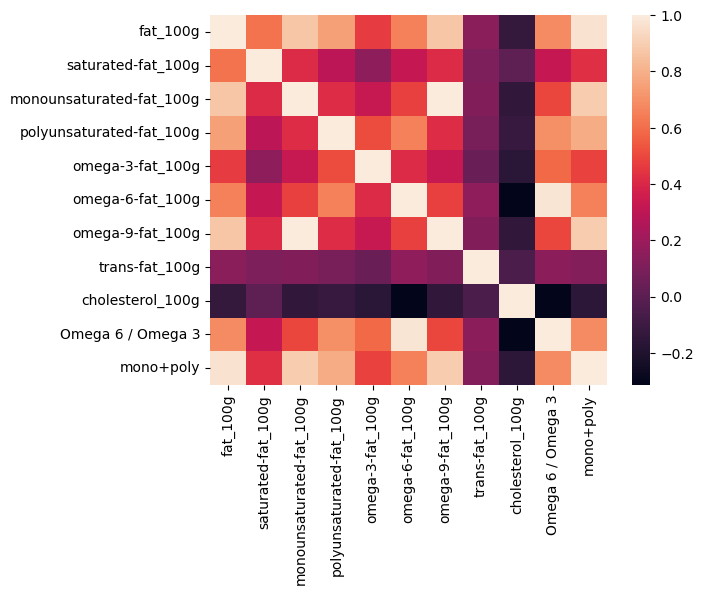

In [26]:
sns.heatmap(dfP3.corr());
plt.savefig('correl.png',bbox_inches='tight')

==> aucune corrélation detecter entre le cholesterole et les autres indicateurs de taux de gras. Idem, entre le taux de gras trans et les autres indicateurs.

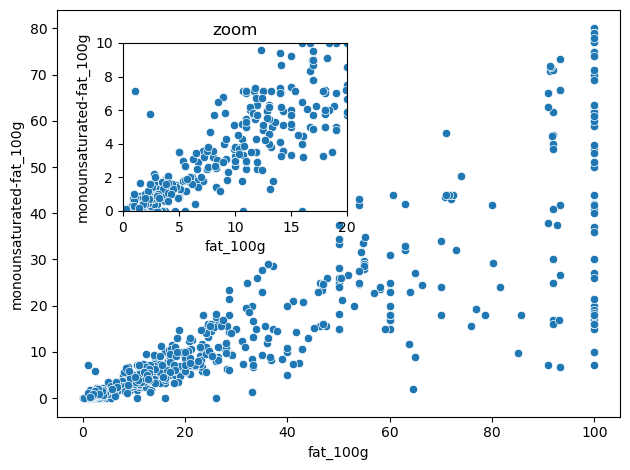

In [41]:
fig, ax = plt.subplots()

sns.scatterplot(x='fat_100g', y='monounsaturated-fat_100g', data=dfP3)
fig.tight_layout()

# inset (encart)
inset_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # X, Y, largeur, hauteur
inset_ax.set_title('zoom')

# définir la plage des axes
inset_ax.set_xlim(0,20)
inset_ax.set_ylim(0,10)

# définir les emplacements des ticks d'axe
#inset_ax.set_yticks([0, 0.005, 0.01])
#inset_ax.set_xticks([-0.1,0,.1]);


sns.scatterplot(x='fat_100g', y='monounsaturated-fat_100g', data=dfP3)
plt.savefig('monoFat.png',bbox_inches='tight')


=> Corrélation mise en évidence notamment pour les petites valeurs de fat _100g
=> Cette rélation est perturbée au niveau des valeurs atypiques! 

<Axes:title={'center':'zoom'}, xlabel='fat_100g', ylabel='polyunsaturated-fat_100g'>

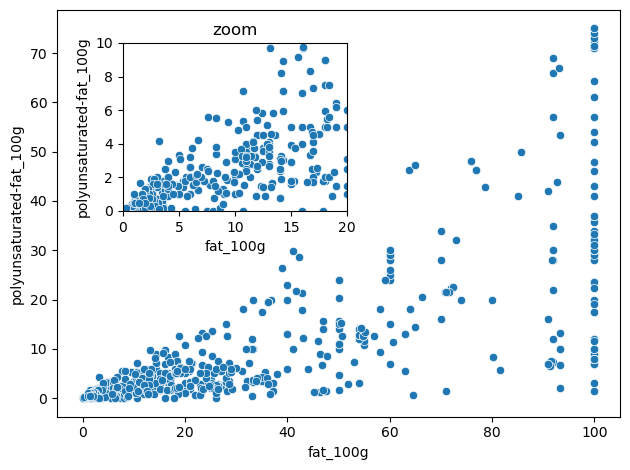

In [43]:
fig, ax = plt.subplots()
sns.scatterplot(x='fat_100g', y='polyunsaturated-fat_100g', data=dfP3)
fig.tight_layout()

# inset (encart)
inset_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # X, Y, largeur, hauteur
inset_ax.set_title('zoom')

# définir la plage des axes
inset_ax.set_xlim(0,20)
inset_ax.set_ylim(0,10)

plt.savefig('polyFat.png',bbox_inches='tight')

sns.scatterplot(x='fat_100g', y='polyunsaturated-fat_100g', data=dfP3)

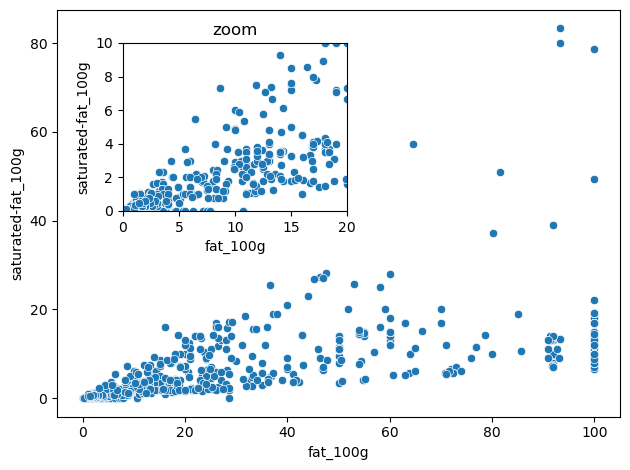

In [44]:
fig, ax = plt.subplots()
sns.scatterplot(x='fat_100g', y='saturated-fat_100g', data=dfP3)
fig.tight_layout()

# inset (encart)
inset_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # X, Y, largeur, hauteur
inset_ax.set_title('zoom')

# définir la plage des axes
inset_ax.set_xlim(0,20)
inset_ax.set_ylim(0,10)
sns.scatterplot(x='fat_100g', y='saturated-fat_100g', data=dfP3)

plt.savefig('satFat.png',bbox_inches='tight')



### Analyse en composantes principales (ACP) 

Pour pouvoir réaliser cette l'analyse, nous utuliserons uniquement les variables sans aucune valeur NaN.

In [45]:
dfP3['fat_100g'].isnull().sum()

0

In [46]:
dfP3.columns

Index(['nutrition_grade_fr', 'pnns_groups_1', 'product_name', 'fat_100g',
       'saturated-fat_100g', 'monounsaturated-fat_100g',
       'polyunsaturated-fat_100g', 'omega-3-fat_100g', 'omega-6-fat_100g',
       'omega-9-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'Omega 6 / Omega 3', 'mono+poly'],
      dtype='object')

In [47]:
dfP3.set_index('product_name',inplace=True)
dfP3

,nutrition_grade_fr,pnns_groups_1,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,omega-6-fat_100g,omega-9-fat_100g,trans-fat_100g,cholesterol_100g,Omega 6 / Omega 3,mono+poly
product_name,,,,,,,,,,,,,
Chaussons tressés aux pommes,c,Sugary snacks,10.70,2.00,3.33000,5.33,1.075012,1.750000,3.33000,0.667,0.005330,2.825013,8.66000
White enriched bread,b,Cereals and potatoes,1.79,0.00,0.00000,0.00,6.974400,3.966667,0.00000,0.000,0.000000,10.941067,0.00000
Light Rye,b,Cereals and potatoes,2.22,1.11,0.00000,0.00,6.974400,3.966667,0.00000,0.000,0.000000,10.941067,0.00000
Hamburger enriched buns,b,Cereals and potatoes,2.33,0.00,0.00000,0.00,6.974400,3.966667,0.00000,0.000,0.000000,10.941067,0.00000
Sliced Almonds,b,Salty snacks,50.00,3.33,33.30000,10.00,4.520000,38.350000,33.30000,0.000,0.000000,42.870000,43.30000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Stone Baked Fresh Gourmet Pizza - Pumpkin & Pizza,d,Composite foods,5.70,2.90,1.90000,0.90,0.623300,0.754000,1.90000,0.100,0.008809,1.377300,2.80000
MeadowLea Lite,d,Fat and sauces,46.00,11.00,23.00000,11.60,3.500000,24.990792,23.00000,0.400,0.003000,28.490792,34.60000
Tuna - Chunky style in spring water,a,Fish Meat Eggs,1.40,0.50,0.20000,0.50,0.400000,1.236667,0.20000,0.100,0.089548,1.636667,0.70000


In [48]:
dfPF=dfP3[['fat_100g', 'saturated-fat_100g',
       'monounsaturated-fat_100g', 'polyunsaturated-fat_100g','trans-fat_100g', 'cholesterol_100g','mono+poly']]

In [49]:
dfPF.isnull().sum()

fat_100g                    0
saturated-fat_100g          0
monounsaturated-fat_100g    0
polyunsaturated-fat_100g    0
trans-fat_100g              0
cholesterol_100g            0
mono+poly                   0
dtype: int64

In [50]:
X = dfPF.values

In [51]:
X

array([[1.07000000e+01, 2.00000000e+00, 3.33000000e+00, ...,
        6.67000000e-01, 5.33000000e-03, 8.66000000e+00],
       [1.79000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.22000000e+00, 1.11000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.40000000e+00, 5.00000000e-01, 2.00000000e-01, ...,
        1.00000000e-01, 8.95481724e-02, 7.00000000e-01],
       [1.79000000e+01, 8.90000000e+00, 3.24717031e+00, ...,
        0.00000000e+00, 0.00000000e+00, 3.24717031e+00],
       [9.20000000e+01, 3.90000000e+01, 4.10000000e+01, ...,
        0.00000000e+00, 1.99193649e-02, 5.30000000e+01]])

In [52]:
type(X)

numpy.ndarray

In [53]:
X.shape

(769, 7)

In [54]:
dfP3.shape

(769, 13)

In [55]:
# Pour une analyse ACP les individus == product_name
names=dfPF.index
names

Index(['Chaussons tressés aux pommes', 'White enriched bread', 'Light Rye',
       'Hamburger enriched buns', 'Sliced Almonds',
       'italian style tomato paste', 'Farmhouse Oatmeal',
       'Farmhouse Sourdough', 'Goldfish Colors',
       'Goldfish Flavor Blasted Xtra Cheddar',
       ...
       'Natural Chip Company Sea Salt & Cracked Pepper',
       'Coco Quench Coconut Milk', 'Licorice Lovers Fresh Licorice',
       'Australian Tiger Prawns', 'Mini loaf Soft white bread',
       'Stone Baked Fresh Gourmet Pizza - Pumpkin & Pizza', 'MeadowLea Lite',
       'Tuna - Chunky style in spring water',
       'Nouilles orientales arôme de poulet - 85 g - Mamee',
       'Healtier palm oil (L'huile de palme)'],
      dtype='object', name='product_name', length=769)

In [56]:
features= dfPF.columns
features

Index(['fat_100g', 'saturated-fat_100g', 'monounsaturated-fat_100g',
       'polyunsaturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'mono+poly'],
      dtype='object')

In [57]:
#instancie un standardScaler ( produit de matrix)
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [58]:
X_scaled = scaler.transform(X)


In [59]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6
mean,-0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [60]:
n_components = 4
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

PCA(n_components=4)

In [61]:
pca.explained_variance_ratio_

array([0.53028099, 0.14564587, 0.13911353, 0.10315309])

==> Ici la 1ère composante capte 51% de la variance de nos données initiales, la 2ème 17%

In [62]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([53.03, 14.56, 13.91, 10.32])

In [63]:
scree_cum = scree.cumsum().round()
scree_cum

array([53., 68., 82., 92.])

In [64]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4]

#### Eboulis des valeurs propres

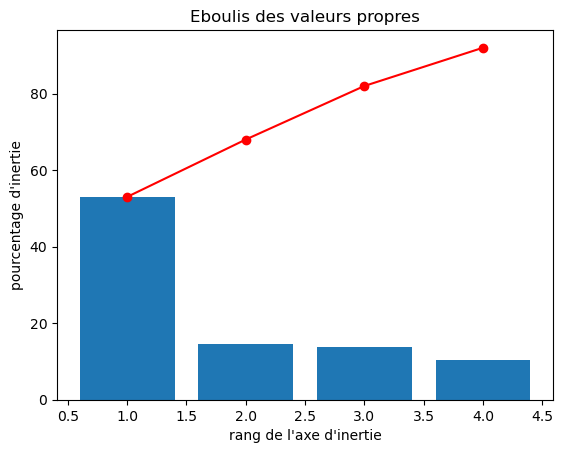

In [65]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.savefig('Eboulis des valeurs propres',bbox_inches='tight')

plt.show(block=False)

On a en bleu la variance de chaque nouvelle composante, et en rouge la variance cumulée.

On voit ici que près de 85% de la variance est comprise dans les 3 premières composantes, et près de 90% dans les 4 premières

In [66]:
pcs = pca.components_
pcs

array([[ 0.51502664,  0.31216511,  0.45007286,  0.3992446 ,  0.09648956,
        -0.09761941,  0.50645719],
       [-0.06904703, -0.29343129, -0.01123743,  0.0203477 ,  0.39555613,
        -0.86724816,  0.00250117],
       [-0.01511442,  0.23181505, -0.04076539, -0.13292539,  0.89936227,
         0.33011058, -0.09421719],
       [ 0.01298422,  0.76474434,  0.06012645, -0.47766878, -0.15891116,
        -0.34481962, -0.19763988]])

In [67]:
# en version Pandas
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6
0,0.515027,0.312165,0.450073,0.399245,0.096490,-0.097619,0.506457
1,-0.069047,-0.293431,-0.011237,0.020348,0.395556,-0.867248,0.002501
2,-0.015114,0.231815,-0.040765,-0.132925,0.899362,0.330111,-0.094217
3,0.012984,0.764744,0.060126,-0.477669,-0.158911,-0.344820,-0.197640


In [68]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,fat_100g,saturated-fat_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,trans-fat_100g,cholesterol_100g,mono+poly
F1,0.52,0.31,0.45,0.40,0.10,-0.10,0.51
F2,-0.07,-0.29,-0.01,0.02,0.40,-0.87,0.00
F3,-0.02,0.23,-0.04,-0.13,0.90,0.33,-0.09
F4,0.01,0.76,0.06,-0.48,-0.16,-0.34,-0.20


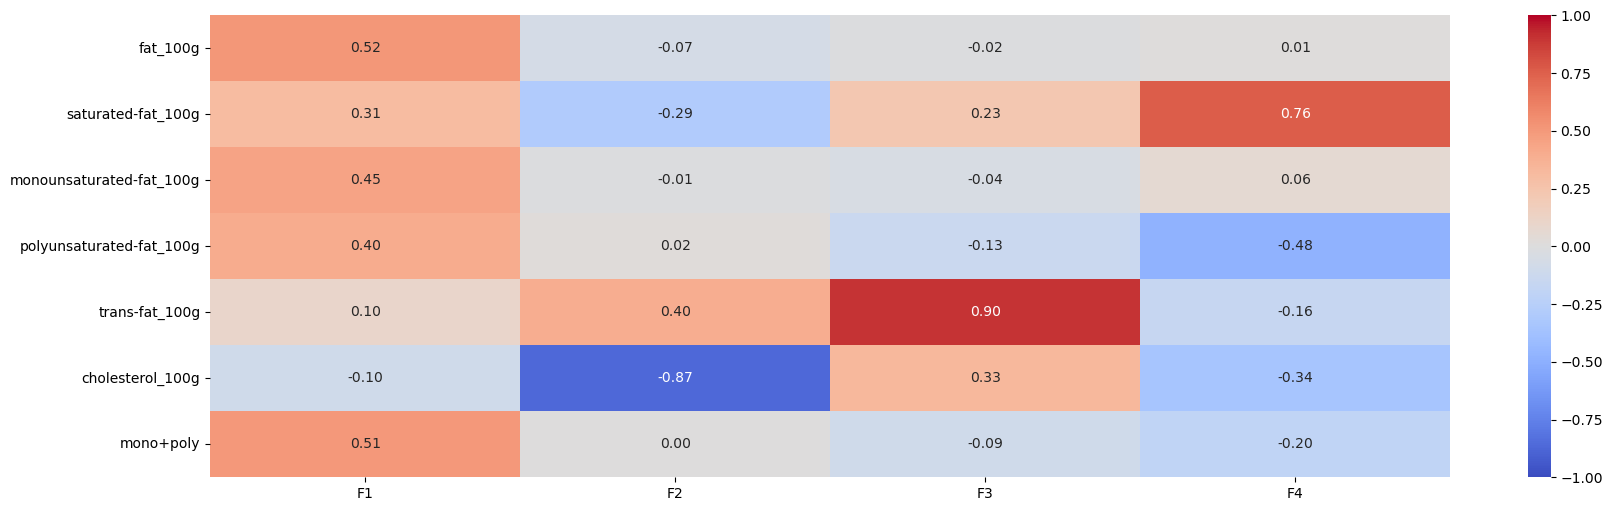

In [69]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")
plt.savefig('correlationPCA',bbox_inches='tight')


#### Cercle de Corrélation

In [70]:
#Définir une fonction qui permet de tracer ce genre de graph
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

<Figure size 540x360 with 0 Axes>

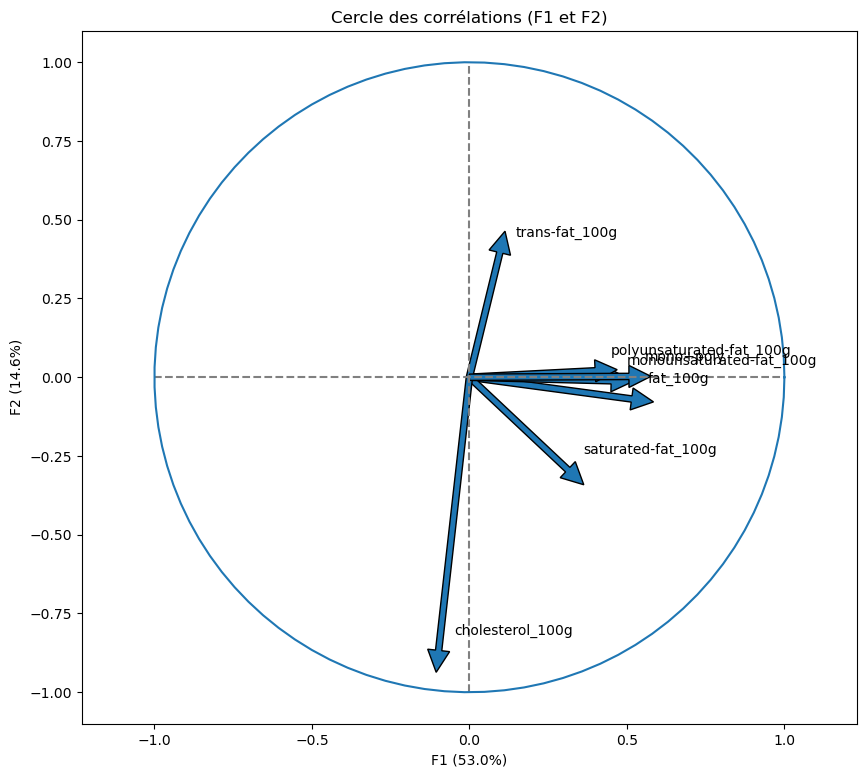

<Figure size 640x480 with 0 Axes>

In [93]:
plt.figure(figsize=(6,4),dpi=90)
x_y = (0,1)
correlation_graph(pca, x_y, features)
plt.savefig('cercleCorrF1F2',bbox_inches='tight');


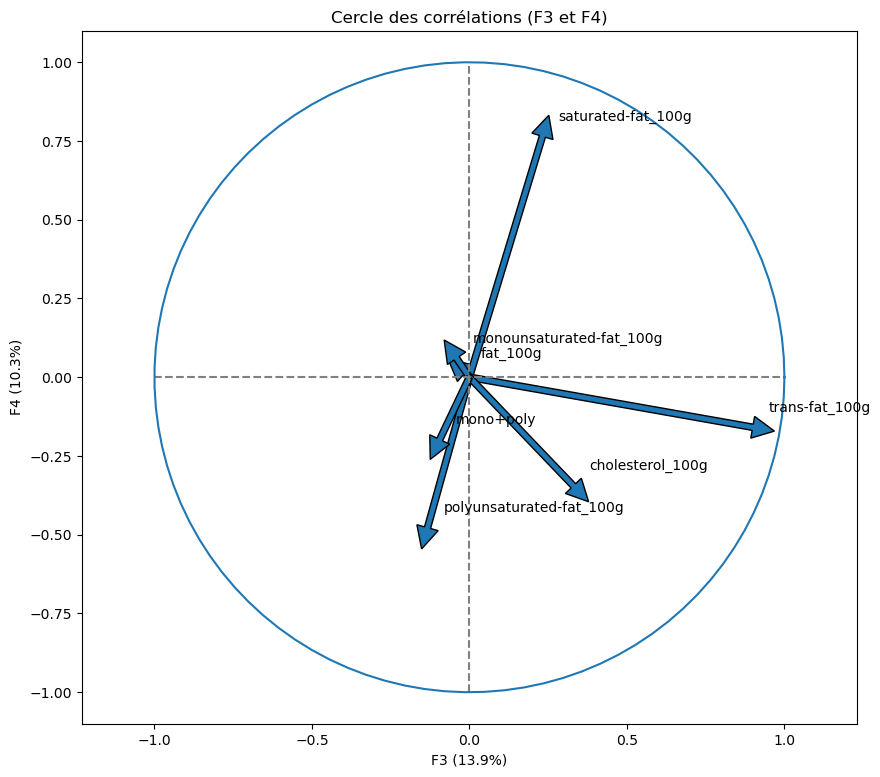

In [72]:
correlation_graph(pca, (2,3), features)

In [73]:
#Projection
X_proj = pca.transform(X_scaled)
X_proj


array([[-0.98403729,  1.05265882,  0.61342773, -0.15346581],
       [-1.68268279,  0.79866087, -0.43288857,  0.11502418],
       [-1.63329942,  0.75766888, -0.40141524,  0.21967464],
       ...,
       [-1.8424863 , -1.11270091,  0.47648614, -0.66722306],
       [-0.95415463,  0.4417899 , -0.20407955,  0.9465104 ],
       [ 3.42998455, -1.23788266,  0.42757439,  2.9980721 ]])

In [74]:
#X_proj contient les - composant de la PCA pour chaque indiv
#convertir Xproj en df 
#ajouter la colonne de pnns a xproj

In [77]:
dfPCA=pd.DataFrame(X_proj,columns=['PCA1','PCA2','PCA3','PCA4'])
dfPCA['pnns1']=dfP3.reset_index()['pnns_groups_1']

Text(0.5, 1.0, 'Projection des individus (sur F1 et F2)')

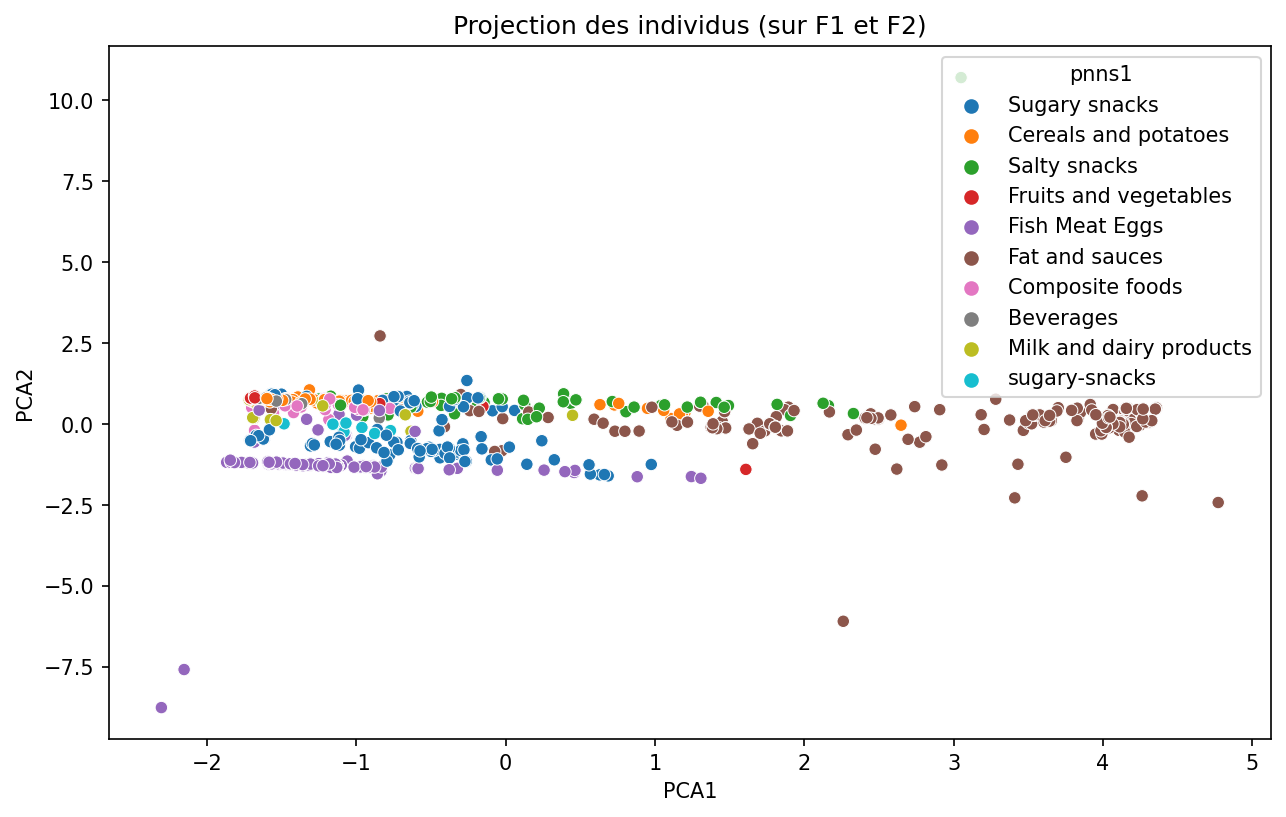

In [84]:
plt.figure(figsize=(10,6),dpi=150)
sns.scatterplot(data=dfPCA, x='PCA1', y='PCA2', hue='pnns1')
plt.title(f"Projection des individus (sur F1 et F2)")



=> F1 reflète  le taux d'acide gras en général alors que F2 présente le taux de cholestérol et d'acide gras trans qui sont inversement corrélés. 
F1 groupe essentiellement les deux catégories les plus riches en gras à savoir fat and sauce et les salty snacks.

In [79]:
dfPCA.pnns1.value_counts()

Fat and sauces             198
Fish Meat Eggs             152
Sugary snacks              114
Cereals and potatoes       105
Salty snacks                65
Beverages                   51
Milk and dairy products     38
Composite foods             25
Fruits and vegetables       12
sugary-snacks                9
Name: pnns1, dtype: int64

Text(0.5, 1.0, 'Projection des individus (sur F2 et F3)')

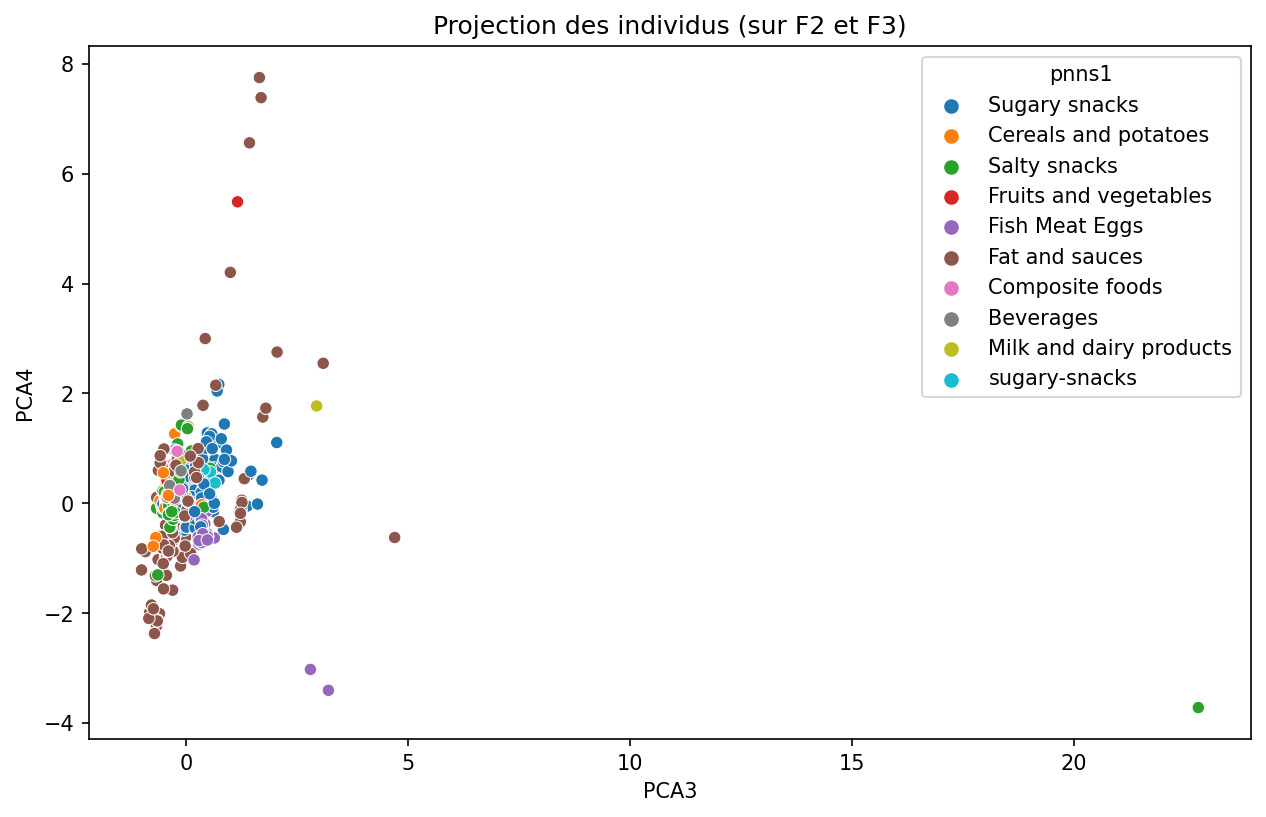

In [85]:
plt.figure(figsize=(10,6),dpi=150)
sns.scatterplot(data=dfPCA, x='PCA3', y='PCA4', hue='pnns1')
plt.title(f"Projection des individus (sur F2 et F3)")
